### **Assignment: Machine Learning for Genomic Data** 

Task: Apply machine learning algorithms, such as random forests or support vector machines, to classify genomic data based on specific features or markers. 

Deliverable: A comprehensive analysis report presenting the classification results, model performance evaluation, and insights into the predictive features. 

### **Importing Libraries**

In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

### **Loading Dataset**

In [2]:
df_dna = pd.read_csv("human.csv")
df_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


### **Setting Target Feature**

In [3]:
y = df_dna["class"]

### **Grouping the seq**

In [4]:
kmer_length = 4

df_dna["words"] = df_dna["sequence"].apply(lambda seq: [seq[i:i+kmer_length] for i in range(0, len(seq) - kmer_length + 1)])
df_dna

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[ATGC, TGCC, GCCC, CCCC, CCCA, CCAA, CAAC, AAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[ATGA, TGAA, GAAC, AACG, ACGA, CGAA, GAAA, AAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[ATGT, TGTG, GTGT, TGTG, GTGG, TGGC, GGCA, GCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[ATGT, TGTG, GTGT, TGTG, GTGG, TGGC, GGCA, GCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[ATGC, TGCA, GCAA, CAAC, AACA, ACAG, CAGC, AGC..."
...,...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0,"[ATGG, TGGA, GGAA, GAAG, AAGA, AGAT, GATT, ATT..."
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[ATGC, TGCA, GCAG, CAGT, AGTC, GTCC, TCCT, CCT..."
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[ATGC, TGCA, GCAG, CAGT, AGTC, GTCC, TCCT, CCT..."
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6,"[ATGG, TGGG, GGGG, GGGC, GGCA, GCAC, CACC, ACC..."


### **Vectorizing the k - mers**

In [5]:
# Vectorize the k-mers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_dna["words"].apply(lambda x: " ".join(x)))
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 885261 stored elements and shape (4380, 336)>

### **Splitting the data into train, validation, and test sets**

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_temp)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 178069 stored elements and shape (876, 336)>
  Coords	Values
  (0, 57)	2
  (0, 309)	9
  (0, 149)	8
  (0, 85)	7
  (0, 84)	5
  (0, 80)	6
  (0, 65)	3
  (0, 7)	1
  (0, 28)	2
  (0, 112)	1
  (0, 272)	1
  (0, 3)	1
  (0, 279)	2
  (0, 113)	2
  (0, 179)	2
  (0, 286)	4
  (0, 58)	8
  (0, 313)	3
  (0, 165)	4
  (0, 81)	2
  (0, 69)	1
  (0, 20)	4
  (0, 83)	7
  (0, 15)	1
  (0, 60)	1
  :	:
  (875, 175)	2
  (875, 178)	1
  (875, 133)	1
  (875, 331)	1
  (875, 315)	2
  (875, 174)	4
  (875, 33)	1
  (875, 11)	1
  (875, 162)	2
  (875, 316)	2
  (875, 171)	3
  (875, 45)	1
  (875, 39)	2
  (875, 126)	4
  (875, 152)	2
  (875, 110)	2
  (875, 168)	2
  (875, 42)	2
  (875, 170)	2
  (875, 99)	1
  (875, 299)	1
  (875, 322)	1
  (875, 105)	3
  (875, 310)	1
  (875, 26)	1


In [7]:
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### **Training and Validating Random Forest Classifier**

In [8]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Validate Random Forest
y_predicted_valid_rf = rf_classifier.predict(X_valid)
accuracy_valid_rf = accuracy_score(y_valid, y_predicted_valid_rf)

### **Training and Validating SVM**

In [9]:
# Initialize and train Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Validate SVM
y_predicted_valid_svm = svm_classifier.predict(X_valid)
accuracy_valid_svm = accuracy_score(y_valid, y_predicted_valid_svm)

### **Testing both Models**

In [10]:
# Testing both models on the test set
y_predicted_test_rf = rf_classifier.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_predicted_test_rf)

y_predicted_test_svm = svm_classifier.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_predicted_test_svm)

### **Evaluating the Models**

In [11]:
# Print model accuracy
print("Validation Accuracy - Random Forest:", accuracy_valid_rf)
print("Validation Accuracy - SVM:", accuracy_valid_svm)

print("Test Accuracy - Random Forest:", accuracy_test_rf)
print("Test Accuracy - SVM:", accuracy_test_svm)

Validation Accuracy - Random Forest: 0.8105022831050228
Validation Accuracy - SVM: 0.6529680365296804
Test Accuracy - Random Forest: 0.7990867579908676
Test Accuracy - SVM: 0.6301369863013698


### **Comparing the Models Visually**

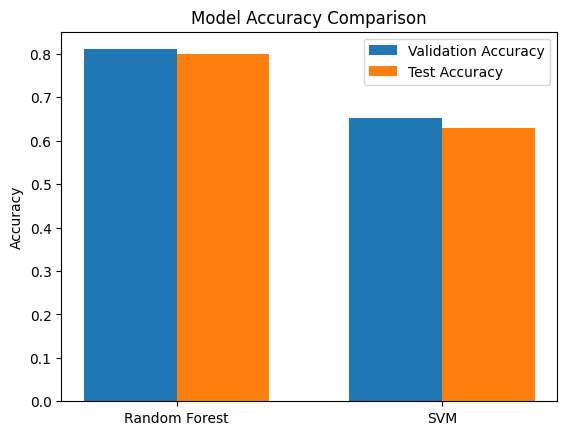

In [12]:
# Create a bar graph to compare model accuracy
models = ['Random Forest', 'SVM']
validation_accuracies = [accuracy_valid_rf, accuracy_valid_svm]
test_accuracies = [accuracy_test_rf, accuracy_test_svm]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, validation_accuracies, width, label='Validation Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()